# palantir

In [1]:
### conda activate porject_lung_exercise_R
### based on https://palantir.readthedocs.io/en/latest/notebooks/Palantir_sample_notebook.html

import palantir
import scanpy as sc
import pandas as pd
import os
import numpy as np

# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [5]:
ad = sc.read_h5ad('/home/sjcho/projects/AT2_MHC2/20241113_after_cellbender/manuscript_figures/figure4/figure4_more_visually_intuitive_outs/wo_cycling_IFN.h5ad')
save_path = '/home/sjcho/projects/AT2_MHC2/20241113_after_cellbender/manuscript_figures/figure4/figure4_and_exd6_20250225/palantir'

In [10]:
ad.obsm['X_pca'].shape

(5404, 50)

In [ ]:
alv_cols = {
    'AT2': '#8192ef',
    'tAT2': '#dfd13a',
    'AT1': '#f66b07',
    'AT2.IFN': '#000000',
    'AT2.prolif.': '#8bd690'
}

In [ ]:
desired_categories = ['AT2', 'tAT2', 'AT1', 'AT2.IFN', 'AT2.prolif.']

ad.obs['majority_voting'] = pd.Categorical(
    ad.obs['majority_voting'],
    categories=desired_categories,
    ordered=False
)

In [28]:
ad.obs['majority_voting']

14dpi_dAT2_GGCGTCATCTAACGGT-1      AT2
14dpi_dAT2_ACCACAAAGGATAATC-1      AT2
14dpi_dAT2_AAGCATCAGACATAAC-1      AT2
14dpi_dAT2_GGTGATTGTTCAATCG-1      AT2
14dpi_dAT2_TGCTGAAGTTCCACGG-1      AT2
                                  ... 
naive_floxed_GGGTAGAAGCTGCCAC-1    AT1
naive_floxed_AGGAAATGTCACTTAG-1    AT1
naive_floxed_CTCCATGAGCGACAGT-1    AT2
naive_floxed_CTATCCGAGGAATGTT-1    AT1
naive_floxed_ATACCGATCCGTGGTG-1    AT1
Name: majority_voting, Length: 5404, dtype: category
Categories (5, object): ['AT2', 'tAT2', 'AT1', 'AT2.IFN', 'AT2.prolif.']

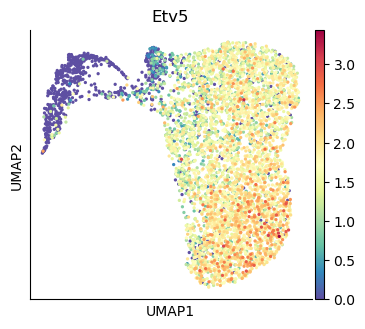

In [ ]:
dm_res = palantir.utils.run_diffusion_maps(ad, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(ad)
from matplotlib import rcParams
rcParams["figure.figsize"] = (4, 3.5)

fig = sc.pl.umap(ad, color='Etv5', sort_order = True, return_fig=True)

fig.savefig(save_path + '/Etv5.pdf', bbox_inches='tight')
fig.savefig(save_path + '/Etv5.png', dpi = 500)

Cell with highest Etv5 expression: naive_dAT2_TAACGACCATGTCTAG-1
Expression value: <Compressed Sparse Column sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 1)>
  Coords	Values
  (0, 0)	3.4378661852992427


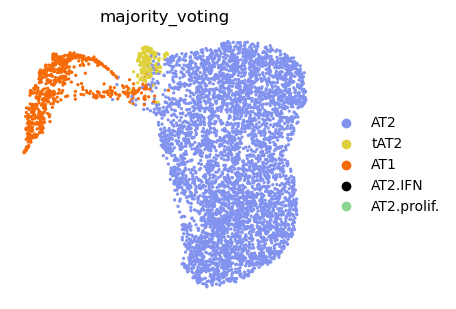

In [30]:
gene_name = 'Etv5'
gene_idx = ad.var_names.get_loc(gene_name)

gene_expression = ad.X[:, gene_idx]
max_cell_idx = np.argmax(gene_expression)
print(f"Cell with highest {gene_name} expression: {ad.obs_names[max_cell_idx]}")
print(f"Expression value: {gene_expression[max_cell_idx]}")

fig = sc.pl.embedding(
    ad,
    basis="umap",
    frameon=False,
    color='majority_voting',
    palette=alv_cols, 
    return_fig=True
)
fig.savefig(save_path + '/umap_celltype.pdf', bbox_inches='tight')
fig.savefig(save_path + '/umap_celltype.png', dpi = 500)

In [31]:
start_cell = 'naive_dAT2_TAACGACCATGTCTAG-1' # because it has most highest Etv5 expression

pr_res = palantir.core.run_palantir(
    ad, start_cell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.020831052462259927 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.12333907683690389 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [32]:
ad.obsm['palantir_fate_probabilities'].to_csv(save_path + '/n_pcs8_palantir_fate_probabilities.csv')
ad.obs['palantir_pseudotime'].to_csv(save_path + '/n_pcs8_palantir_pseudotime.csv')
ad.obs['palantir_entropy'].to_csv(save_path + '/n_pcs8_palantir_entropy.csv')

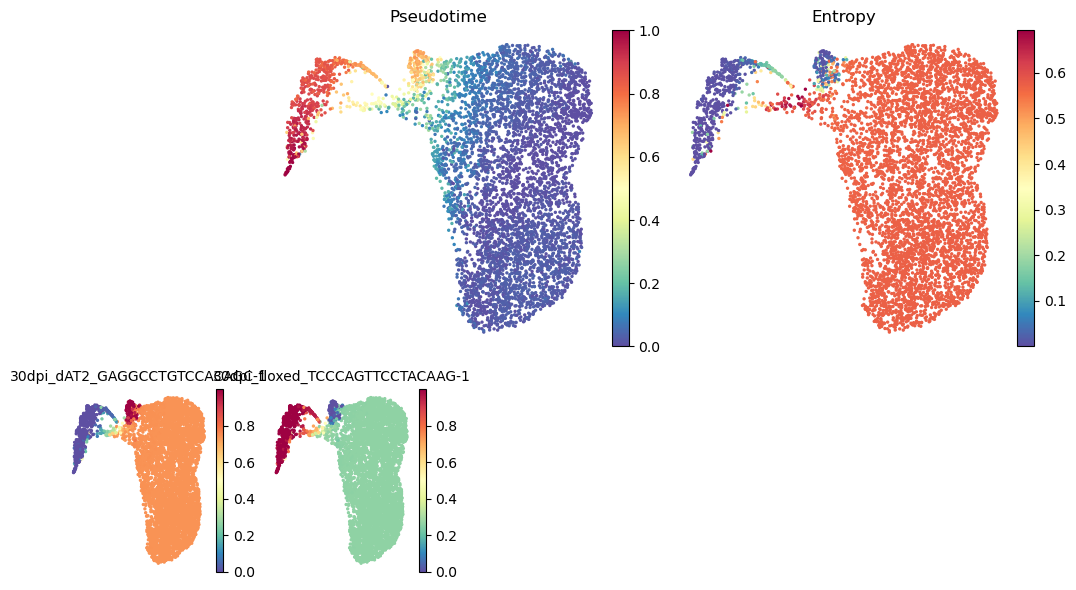

In [33]:
figs = palantir.plot.plot_palantir_results(ad, s=2)
figs.show()
figs.savefig(save_path + '/palantir_results.pdf', bbox_inches='tight')
figs.savefig(save_path + '/palantir_results.png', dpi = 500)

In [34]:
masks = palantir.presults.select_branch_cells(ad, q=0.01, eps=0.01) # default parameter

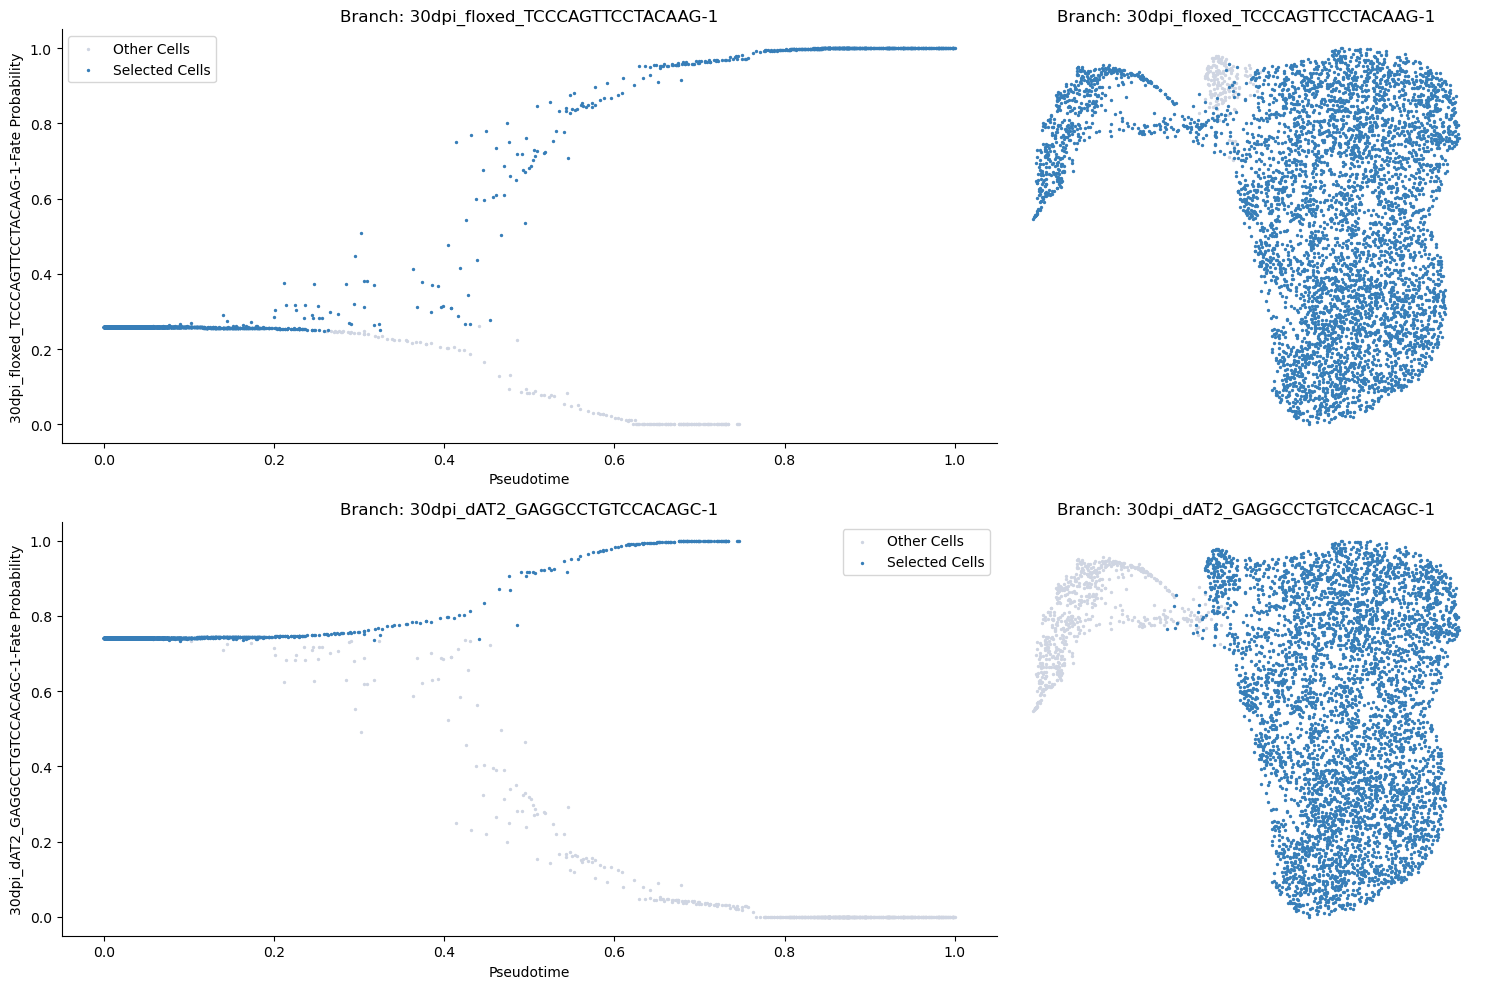

In [35]:
figs = palantir.plot.plot_branch_selection(ad, s= 2)
figs.show()
figs.savefig(save_path + '/branch_selection.pdf', bbox_inches='tight')
figs.savefig(save_path + '/branch_selection.png', dpi = 500)

ad.obsm['branch_masks'].to_csv(save_path + '/n_pcs8_branch_masks.csv')